In [3]:
import pandas as pd
# Load dataset
df = pd.read_csv("D:\\twitter_disaster (1).csv")

In [5]:
print(df.shape)
print(df.columns)
print(df.head())

(7613, 5)
Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


✅ Step 2: Understand the Structure

In [7]:
print(df.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [9]:
print(df['target'].value_counts())

target
0    4342
1    3271
Name: count, dtype: int64


✅ Step 3: Data Cleaning 

In [11]:
import re

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r"http\S+", "", text)               # Remove URLs
    text = re.sub(r"@\w+", "", text)                  # Remove mentions
    text = re.sub(r"#", "", text)                     # Remove hashtags symbol
    text = re.sub(r"[^a-zA-Z\s]", "", text)           # Remove punctuation and numbers
    text = text.lower()                               # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()          # Remove extra spaces
    return text

# Apply cleaning to the 'text' column
df['clean_text'] = df['text'].apply(clean_text)

# Preview cleaned data
print(df[['text', 'clean_text']].head())


                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   

                                          clean_text  
0  our deeds are the reason of this earthquake ma...  
1              forest fire near la ronge sask canada  
2  all residents asked to shelter in place are be...  
3  people receive wildfires evacuation orders in ...  
4  just got sent this photo from ruby alaska as s...  



✅Step 4: Tokenization & Stopword Removal

In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

# Apply to cleaned text
df['tokens'] = df['clean_text'].apply(tokenize_and_remove_stopwords)

# Preview
print(df[['clean_text', 'tokens']].head())


                                          clean_text  \
0  our deeds are the reason of this earthquake ma...   
1              forest fire near la ronge sask canada   
2  all residents asked to shelter in place are be...   
3  people receive wildfires evacuation orders in ...   
4  just got sent this photo from ruby alaska as s...   

                                              tokens  
0       deeds reason earthquake may allah forgive us  
1              forest fire near la ronge sask canada  
2  residents asked shelter place notified officer...  
3  people receive wildfires evacuation orders cal...  
4  got sent photo ruby alaska smoke wildfires pou...  


✅ Step 5: TF-IDF Vectorization


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words

# Fit and transform the tokenized text
X = tfidf.fit_transform(df['tokens'])

# Target labels
y = df['target']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


✅ Step 6: Model Training

In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
✅ Make Predictions

In [23]:
# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
✅ Step 7: Evaluate the Model

Accuracy: 0.8030203545633617
Precision: 0.8298676748582231
Recall: 0.6764252696456087
F1 Score: 0.7453310696095077

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       874
           1       0.83      0.68      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



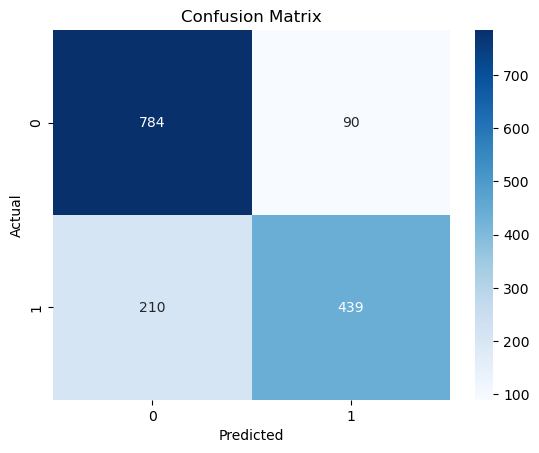

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
✅ Step 8: Save the Model and Vectorizer

In [63]:
import pickle

# Save the trained model
with open("tweet_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("Model and vectorizer saved!")


Model and vectorizer saved!
